## Artificial Intelligence Assignment 1
## 3번 : 규제
## 20132651 Sungjae Lee

In [1]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline
# 앞에서 사용한 numpy 와 sklearn, matplotlib 패키지를 가져옵니다

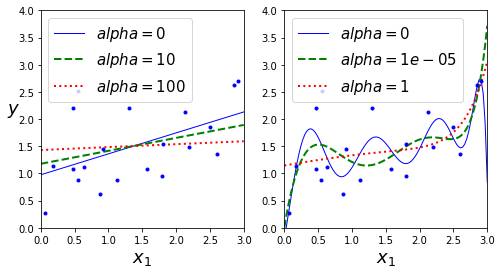

In [2]:
# 1. 화면 출력 확인
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1)/1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)
def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                ("poly_features", PolynomialFeatures(degree = 10, include_bias = False)),
                ("std_scaler", StandardScaler()),
                ("regul_reg", model),
            ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth = lw, label = r"$alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth = 3)
    plt.legend(loc = "upper left", fontsize = 15)
    plt.xlabel("$x_1$", fontsize = 18)
    plt.axis([0, 3, 0, 4])
    
plt.figure(figsize = (8, 4))
plt.subplot(121)
plot_model(Ridge, polynomial = False, alphas = (0, 10, 100), random_state = 42)
plt.ylabel("$y$", rotation = 0, fontsize = 18)
plt.subplot(122)
plot_model(Ridge, polynomial = True, alphas = (0, 10**-5, 1), random_state = 42)
plt.show()
# 규제에 따른 예측선의 변화를 그래프를 이용해 살펴봅니다
# 알파값이 0일 때 과적합에 가까워지며 알파값이 높아지면 규제가 강해지는 것으로 보입니다
# 즉, 적절한 알파값을 활용하여 최적의 데이터 예측 모델을 생성하는 것이 중요합니다